# Exercise 1: Linear Regression

## Do not start the exercise until you fully understand the submission guidelines.


* The homework assignments are executed automatically. 
* Failure to comply with the following instructions will result in a significant penalty. 
* Appeals regarding your failure to read these instructions will be denied. 
* Kindly reminder: the homework assignments contribute 50% of the final grade.


## Read the following instructions carefully:

1. This Jupyter notebook contains all the step-by-step instructions needed for this exercise.
1. Write **efficient**, **vectorized** code whenever possible. Some calculations in this exercise may take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deductions.
1. You are responsible for the correctness of your code and should add as many tests as you see fit to this jupyter notebook. Tests will not be graded nor checked.
1. Complete the required functions in `hw1.py` script only. This exercise is graded automatically, and only the `hw1.py` script is tested.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/), numpy and pandas only. **Do not import anything else.**
1. Your code must run without errors. Use at least `numpy` 1.15.4. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Submission includes a zip file that contains the hw1.py script as well as this notebook, with your ID as the file name. For example, `hw1_123456789_987654321.zip` if you submitted in pairs and `hw1_123456789.zip` if you submitted the exercise alone.
Please use only a **zip** file in your submission.

---
---

## Please sign that you have read and understood the instructions: 

### *** 208789172 ***
### *** 318601622 ***

---
---

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting
np.random.seed(42) 

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Part 1: Data Preprocessing (10 Points)

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
# Read comma separated data
df = pd.read_csv('data.csv')
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Fortunately, pandas is built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [5]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Use [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`). 

Your implementation should not contain loops.

---
Open `hw1.py` and complete the function `preprocess`. (5 points)

In [6]:
from hw1 import preprocess

X, y = preprocess(X, y)
X.shape, y.shape

((5000,), (5000,))

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [7]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization
Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. Note that many real-world datasets are highly dimensional and cannot be visualized naively. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

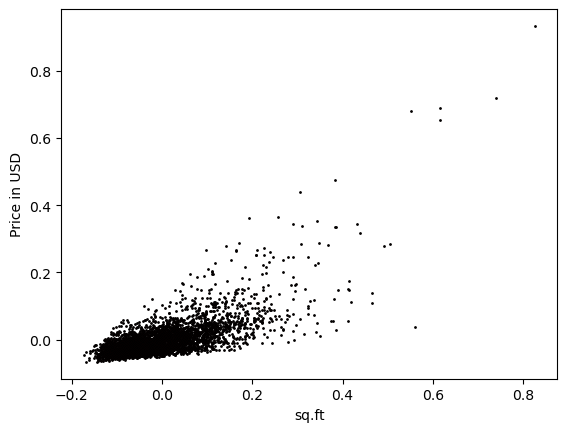

In [8]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

Make sure that `X` takes into consideration the bias $\theta_0$ in the linear model. Hint, recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Add columns of ones as the zeroth column of the features (do this for both the training and validation sets).

---
Open `hw1.py` and complete the function `apply_bias_trick`. (5 points)

In [9]:
from hw1 import apply_bias_trick

X_train = apply_bias_trick(X_train)
X_val = apply_bias_trick(X_val)

X_train.shape, X_val.shape

((4000, 2), (1000, 2))

## Part 2: Single Variable Linear Regression (60 Points)
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

---

Open `hw1.py` and complete the function `compute_cost`. (10 points)

In [10]:
from hw1 import compute_cost
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)
print(J)

0.5110382451954535


Open `hw1.py` and complete the function `gradient_descent`. (30 points)

In [11]:
from hw1 import gradient_descent

np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

You can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help you find problems with your code. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

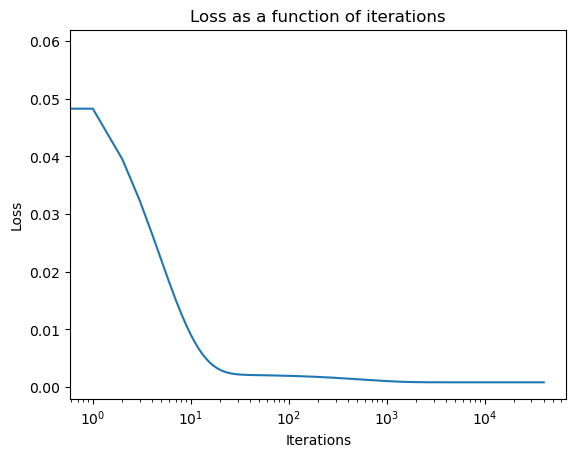

In [12]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

The pseudo inverse solution is a direct approach to finding the best-fitting parameters of the linear model. In your implementation, **do not use `np.linalg.pinv`**. Instead, use only direct matrix multiplication as you saw in class (you can calculate the inverse of a matrix using `np.linalg.inv`).

---
Open `hw1.py` and complete the function `compute_pinv`. (10 points)

In [13]:
from hw1 import compute_pinv

In [14]:
theta_pinv = compute_pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

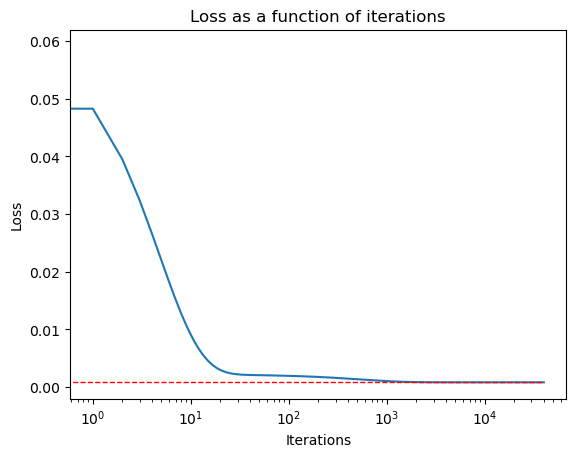

In [15]:
plt.plot(np.arange(len(J_history)), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next. 

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. Make sure you use the training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

**After implementing `efficient_gradient_descent` and finding the best alpha value, use them for the rest of the exercise.**

---
Open `hw1.py` and complete the function `efficient_gradient_descent` and `find_best_alpha`. (5 points each)

In [16]:
from hw1 import efficient_gradient_descent, find_best_alpha

In [17]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)
alpha_dict

{1e-05: 0.033153135433815595,
 3e-05: 0.008192951588224312,
 0.0001: 0.0019911164880719273,
 0.0003: 0.001945555691446852,
 0.001: 0.0013675183294403238,
 0.003: 0.0009048133965611656,
 0.01: 0.0007742437200288935,
 0.03: 0.0007340843130279901,
 0.1: 0.0007182981633402743,
 0.3: 0.000712881394934546,
 1: 0.0007104324065637831,
 2: 0.07132916466326125,
 3: 1.1238541744402215}

We can now obtain the best learning rate from the dictionary `alpha_dict` in a single line.

In [18]:
best_alpha = min(alpha_dict, key=alpha_dict.get)
print(best_alpha)

1


The following code gets the best three alpha values you just calculated and provides a graph with three lines indicating the training loss as a function of iterations. Use it as a test for your implementation. You can change this code as you see fit.

(4000, 2)
(4000, 2)
(4000, 2)


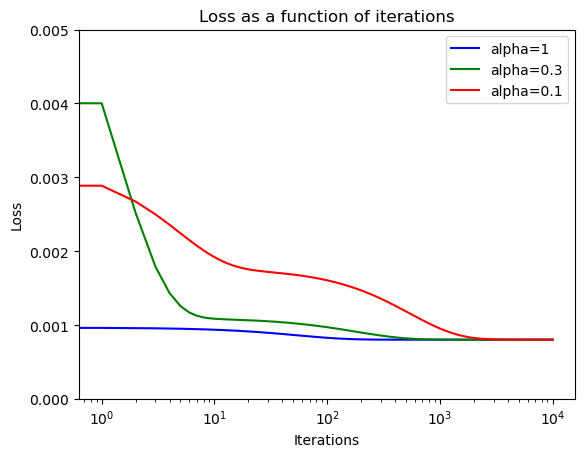

In [19]:
top_3_alphas = sorted([(value, key) for key, value in alpha_dict.items()], reverse=False)[:3]
top_3_alphas = [x[1] for x in top_3_alphas]

histories = []
for alpha in top_3_alphas:
    print(X_train.shape)
    params = np.random.random(size=2)
    _, J_history = gradient_descent(X_train ,y_train, params, alpha, num_iters=10000)
    histories.append(J_history)

for i, (alpha, color) in enumerate(zip(top_3_alphas, ['b','g','r'])):
    plt.plot(np.arange(10000), histories[i], color, label='alpha='+str(alpha))

plt.xscale('log')
plt.ylim(0, 0.005)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.legend()
plt.show()


This is yet another check. This function plots the regression lines of your model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

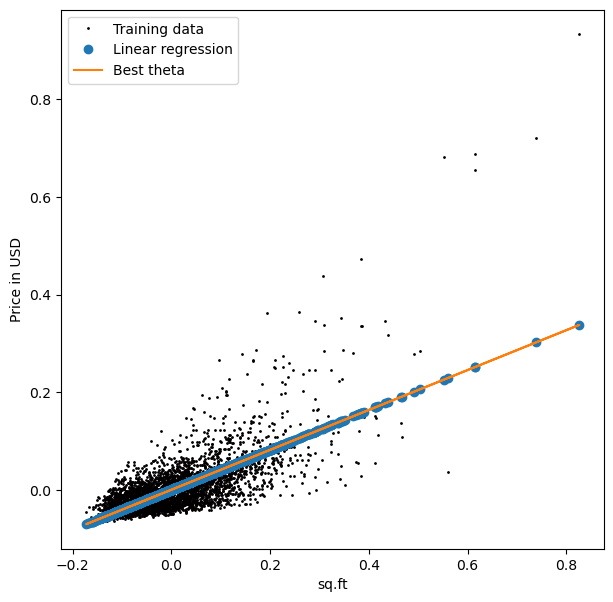

In [20]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Part 2: Multivariate Linear Regression

In most cases, you will deal with datasets that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multivariate linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$


If you wrote proper vectorized code, this part should be trivial and work without changes. If this is not the case, you should go back and edit your functions such that they support both multivariate and single variable regression. **Your code should not check the dimensionality of the input before running**.

In [21]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant so we will go ahead and drop them.

In [22]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

Use the same `preprocess` function you implemented previously. Notice that proper vectorized implementation should work regardless of the dimensionality of the input. You might want to check that your code in the previous parts still works.

In [23]:
# preprocessing
X, y = preprocess(X, y)

In [24]:
# training and validation split 
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data. Visualizing additional dimensions requires advanced techniques we will learn later in the course.

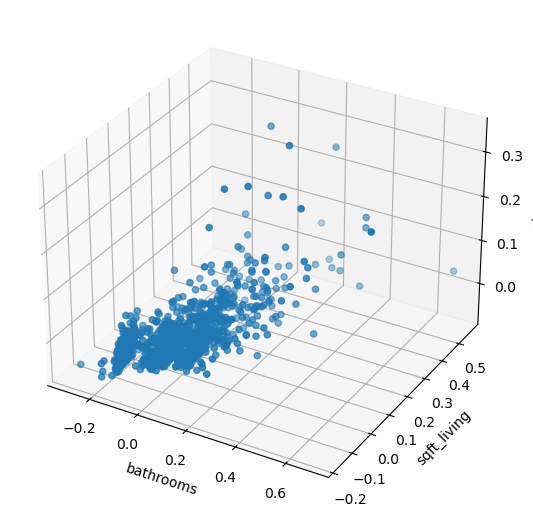

In [25]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
fig.add_axes(ax)
plt.show()

Make sure the functions `apply_bias_trick`, `compute_cost`, `gradient_descent`, `efficient_gradient_descent` and `compute_pinv` work on the multi-dimensional dataset. If you make any changes, make sure your code still works on the single variable regression model. 

In [26]:
# bias trick
X_train = apply_bias_trick(X_train)
X_val = apply_bias_trick(X_val)

X_train.shape, X_val.shape

((4000, 18), (1000, 18))

In [27]:
# calculating the cost
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [28]:
# running the efficient version of gradient descent
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = efficient_gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

In [29]:
# calculating the pseudoinverse
theta_pinv = compute_pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

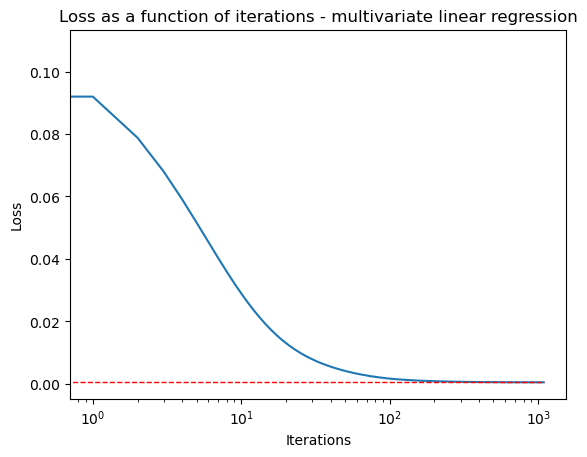

In [30]:
plt.plot(np.arange(len(J_history)), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Part 3: Forward feature selection (15 points)

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance. 

Forward feature selection is a greedy, iterative algorithm used to select the most relevant features for a predictive model. The objective of this algorithm is to improve the model's performance by identifying and using only the most relevant features, potentially reducing overfitting, improving accuracy, and reducing computational cost. 

Implement forward feature selection using the following guidelines: 
1. Start with an empty set of selected features.
1. For each feature not yet in the selected set, do the following:
    1. Add the feature to the selected set temporarily.
    1. Train a model using the current set of selected features and evaluate its performance by calculating the cost or error on a validation set.
    1. Remove the temporarily added feature from the selected set.
1. Choose the feature that resulted in the best model performance and permanently add it to the selected set.
1. Repeat steps 2-3 until you have 5 features (not including the bias).

---
Open `hw1.py` and complete the function `forward_feature_selection`.

**Note that you should use the inputs as provided in the next cell and don't forget to use the bias trick inside `forward_feature_selection`**.

In [31]:
df = pd.read_csv('data.csv')
feature_names = df.drop(columns=['price', 'id', 'date']).columns.values
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

# preprocessing
X, y = preprocess(X, y)

# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

In [32]:
from hw1 import forward_feature_selection

In [33]:
ffs = forward_feature_selection(X_train, y_train, X_val, y_val, best_alpha, iterations)
for feature in ffs:
    print(feature_names[feature])

sqft_living
lat
waterfront
grade
yr_built


## Part 4: Polynomial regression (15 points)

Implement a function to create polynomial features up to a degree of 2 for given dataset. The function should take a pandas DataFrame as input and should return a new DataFrame with all possible square features, including the original features. When you create the new dataframe, make sure the feature names also represent the transformation performed. For example: `sqft_lot`, `yr_built^2`, `bedrooms*bathrooms`, ...

After you obtain the polynomial dataframe, use forward feature selection and print the 5 best features.

Open `hw1.py` and complete the function `create_square_features`.

In [34]:
from hw1 import create_square_features

In [35]:
df = pd.read_csv('data.csv')

y = df['price'].values
df = df.drop(columns=['price', 'id', 'date'])
df_poly = create_square_features(df)
X = df_poly.values
df_poly

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat^2,lat*long,lat*sqft_living15,lat*sqft_lot15,long^2,long*sqft_living15,long*sqft_lot15,sqft_living15^2,sqft_living15*sqft_lot15,sqft_lot15^2
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,2257.314125,-5808.576778,63665.008,268438.2800,14946.774049,-163824.38,-690752.050,1795600,7571000,31922500
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,2277.293841,-5837.184999,80648.490,364540.7190,14961.937761,-206719.11,-934394.841,2856100,12909910,58354321
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,2278.907096,-5835.146731,129847.088,384862.9498,14940.906289,-332473.76,-985442.446,7398400,21928640,64995844
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,2258.226433,-5816.213274,64628.288,237604.0000,14980.046449,-166454.48,-611965.000,1849600,6800000,25000000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,2267.359642,-5811.392356,85710.240,357268.8504,14894.982025,-219681.00,-915703.635,3240000,13505400,56295009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,2.25,3420,9900,1.0,0,0,3,9,1710,...,2279.222177,-5836.648147,109327.348,510830.8400,14946.529536,-279966.24,-1308139.200,5244100,24503000,114490000
4996,3,1.75,1710,15844,1.0,0,0,4,8,1710,...,2253.457864,-5796.160260,94466.494,966453.9454,14908.410000,-242979.00,-2485833.900,3960100,40514410,414488881
4997,3,1.50,1580,10517,1.0,0,0,4,6,1580,...,2236.372474,-5779.536724,66206.420,504020.0174,14936.261796,-171099.60,-1302556.812,1960000,14921200,113592964
4998,3,2.00,1230,11413,1.0,0,0,3,7,990,...,2268.816950,-5812.735691,74782.397,548578.8957,14892.297156,-191593.38,-1405465.578,2464900,18081690,132641289


In [36]:
# preprocessing
X, y = preprocess(X, y)

In [37]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

In [38]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4000, 170), (1000, 170), (4000,), (1000,))

In [39]:
feature_names = df_poly.columns.values

In [40]:
ffs = forward_feature_selection(X_train, y_train, X_val, y_val, best_alpha, iterations)

In [41]:
for feature in ffs:
    print(feature_names[feature])

sqft_living*grade
lat*long
bathrooms*waterfront
yr_built*zipcode
sqft_living*yr_built
